In [1]:
# Standard form LP with random data
import time

import numpy as np
from numpy.random import rand, randn, seed
import matplotlib.pyplot as plt

QUIET = False
MAX_ITER = 1000
ABSTOL = 1e-4
RELTOL = 1e-2

def linear_program(c, A, b, rho, alpha):
    t_start = time.time()


    m, n = np.shape(A)

    z = np.zeros((n, 1))
    u = np.zeros((n, 1))

    if not QUIET:
        print('%3s\t' % 'iter', '%10s\t' % 'r norm', '%10s\t' % 'eps pri', '%10s\t' % 's norm', '%10s\t' % 'eps dual',
              '%10s\n' % 'objective')

    history = {'objval': [], 'r_norm': [], 'eps_pri': [], 's_norm': [], 'eps_dual': [], 'iter': []}

    for k in range(0, MAX_ITER):
        # x - update
        x = np.linalg.solve(
            np.concatenate((np.block([rho * np.eye(n), A.transpose()]), np.block([A, np.zeros((m, m))]))),
            np.concatenate((rho * (z - u) - c, b)))[0:n]
        # z - update with relaxation
        zold = z
        x_hat = alpha * x + (1 - alpha) * zold
        z = np.maximum(np.zeros((n, 1)), x_hat + u)
        u = u + (x_hat - z)
        # diagnostics, reporting, termination checks
        history['iter'].append(k)
        history['objval'].append(objective(c, x)[0][0])
        history['r_norm'].append(np.linalg.norm(x - z))
        history['s_norm'].append(np.linalg.norm(-rho * (z - zold)))
        history['eps_pri'].append(np.sqrt(n) * ABSTOL + RELTOL * max(np.linalg.norm(x), np.linalg.norm(-z)))
        history['eps_dual'].append(np.sqrt(n) * ABSTOL + RELTOL * np.linalg.norm(rho * u))
        if not QUIET:
            print('%3d\t' % k, '%10.4f\t' % history['r_norm'][k], '%10.4f\t' % history['eps_pri'][k],
                  '%10.4f\t' % history['s_norm'][k],
                  '%10.4f\t' % history['eps_pri'][k], '%10.4f' % history['objval'][k])

        if (history['r_norm'][k] < history['eps_pri'][k]) and (history['s_norm'][k] < history['eps_dual'][k]):
            print("Convergence")
            break

    if not QUIET:
        t_end = time.time()
        print(str(t_end - t_start) + "sec Elapsed")
    return [z, history]


def objective(c, x):
    return c.conj().transpose() @ x


In [2]:
seed(0)

n = 500
m = 400

c = rand(n, 1) + 0.5
x0 = abs(randn(n, 1))
A = abs(randn(m, n))
b = A @ x0

[x, history] = linear_program(c, A, b, 1.0, 1.0)

iter	     r norm	    eps pri	     s norm	   eps dual	  objective

  0	     1.0656	     0.2161	    21.3555	     0.2161	   376.7731
  1	     1.1226	     0.2216	     2.7441	     0.2216	   368.9034
  2	     1.4719	     0.2292	     2.4038	     0.2292	   362.4706
  3	     1.6212	     0.2363	     2.0494	     0.2363	   358.2285
  4	     1.5764	     0.2420	     1.8116	     0.2420	   356.0799
  5	     1.5808	     0.2461	     1.5190	     0.2461	   355.4861
  6	     1.4657	     0.2477	     1.2955	     0.2477	   356.0819
  7	     1.2745	     0.2476	     1.2274	     0.2476	   357.3178
  8	     1.1203	     0.2468	     1.1607	     0.2468	   358.7585
  9	     1.0174	     0.2458	     1.0671	     0.2458	   360.1764
 10	     0.9313	     0.2449	     0.9836	     0.2449	   361.4073
 11	     0.8378	     0.2442	     0.9079	     0.2442	   362.3730
 12	     0.7823	     0.2438	     0.8266	     0.2438	   363.0480
 13	     0.7059	     0.2436	     0.7788	     0.2436	   363.4569
 14	     0.6499	     0.2436	     0.701

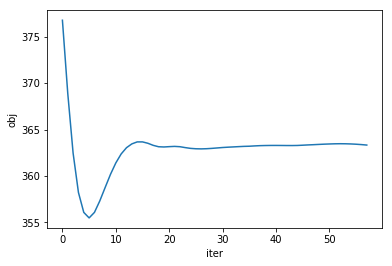

In [3]:
plt.plot(history['iter'], history['objval'])
plt.ylabel('obj')
plt.xlabel('iter')
plt.show()

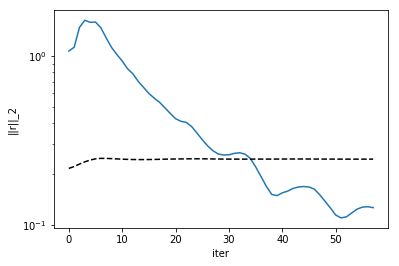

In [4]:
plt.plot(history['iter'], history['r_norm'])
plt.plot(history['iter'], history['eps_pri'],'k--')
plt.ylabel('||r||_2')
plt.xlabel('iter')
plt.yscale('log')
plt.show()

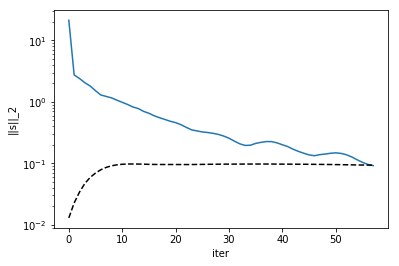

In [5]:
plt.plot(history['iter'], history['s_norm'])
plt.plot(history['iter'], history['eps_dual'],'k--')
plt.ylabel('||s||_2')
plt.xlabel('iter')
plt.yscale('log')
plt.show()